In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modeules imported successfully")

All modeules imported successfully


In [2]:
df = pd.read_csv('../data/calories.csv')

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.drop('User_ID', axis=1, inplace=True)

In [5]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [7]:
df.duplicated().sum()

np.int64(1)

#### Insights

- The data shows a wide range of values for each variable, indicating diverse user profiles and activity levels.

- The median values (50th percentile) for age, height, weight, duration, heart rate, body temperature, and calories burned are close to the mean, suggesting a relatively symmetric distribution for these variables.

- The maximum values for height (222 cm) and weight (132 kg) are notably high, which could indicate outliers or data entry errors.

- The minimum calories burned (1 calorie) for an activity duration of 1 minute might also be an outlier or represent very light activities.

- No null / missing values are present. All features have right data types

- No duplicate values

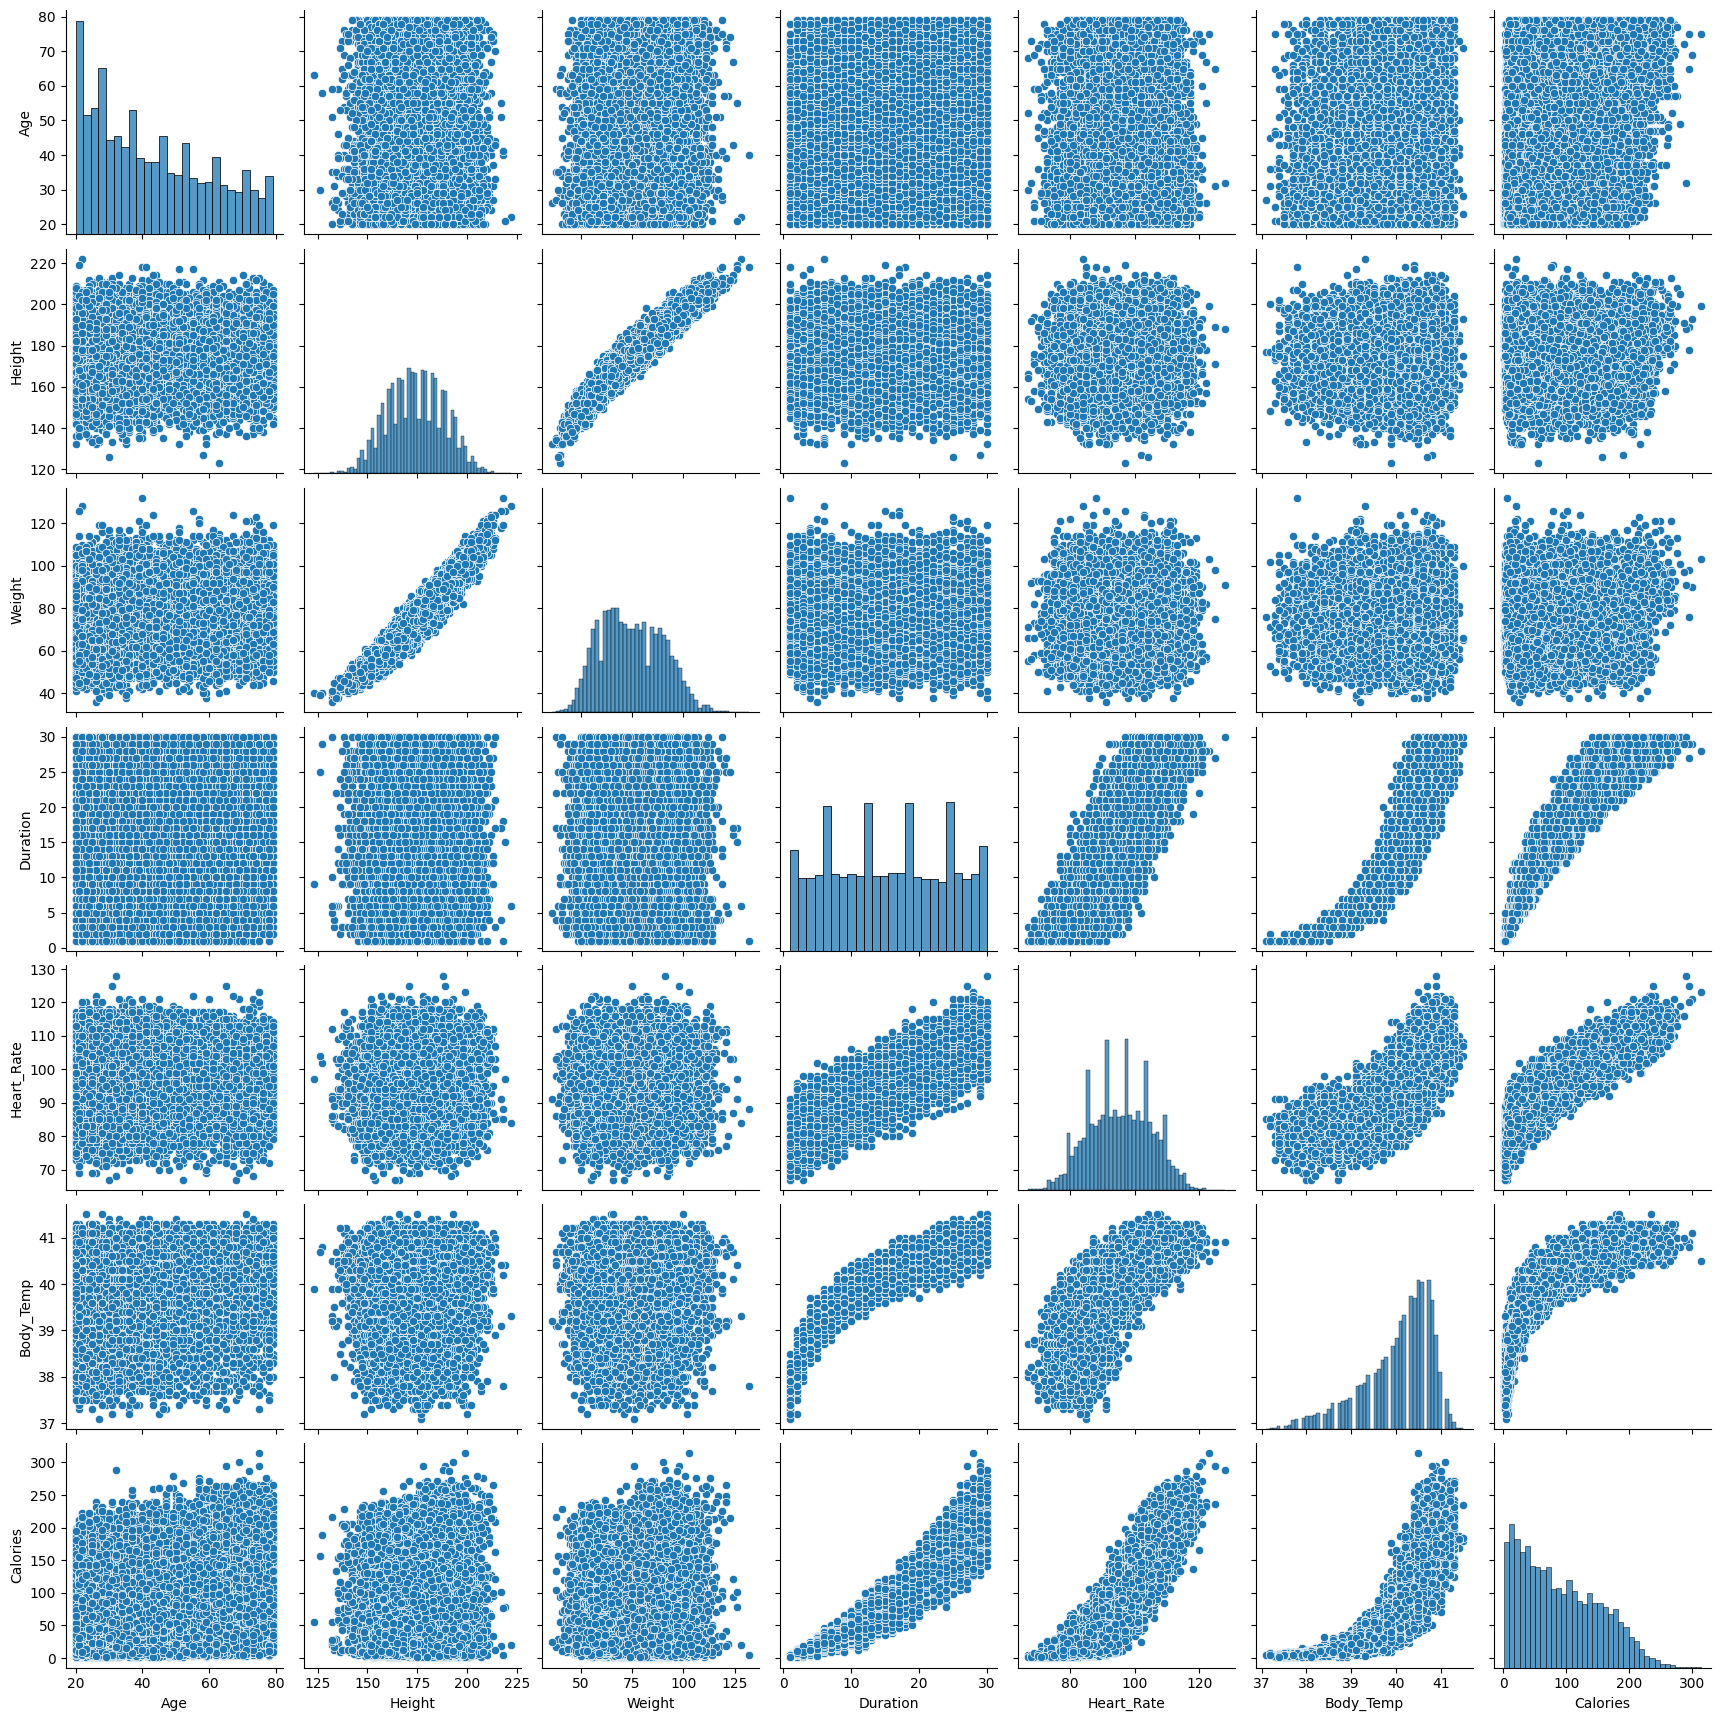

In [8]:
sns.pairplot(df)

Correlation Between Variables:

- There are strong positive correlations between:
    - Duration and Calories Burned: Longer workout durations lead to higher calorie expenditure.
    - Heart Rate and Calories Burned: Higher heart rates are associated with more calories burned.
    - Body Temperature and Calories Burned: A rise in body temperature correlates with increased calorie burning.
    - Duration and Heart Rate: Longer durations tend to result in higher heart rates.
    - Height and Weight show a positive correlation, which is expected.

- Histograms on the Diagonal:

    - Age has a right-skewed distribution, meaning most individuals in the dataset are younger.
    - Duration appears to have a somewhat uniform distribution with some specific intervals showing higher frequencies.
    - Weight has a normal-like distribution.
    - Calories burned has a right-skewed distribution, suggesting most people burn a lower number of calories, with fewer cases of high calorie expenditure.

- Outliers & Clustering:

    - There may be some outliers in features like Calories, where a few individuals burn exceptionally high amounts.
    - No clear clusters, suggesting a continuous range of values rather than distinct groups.

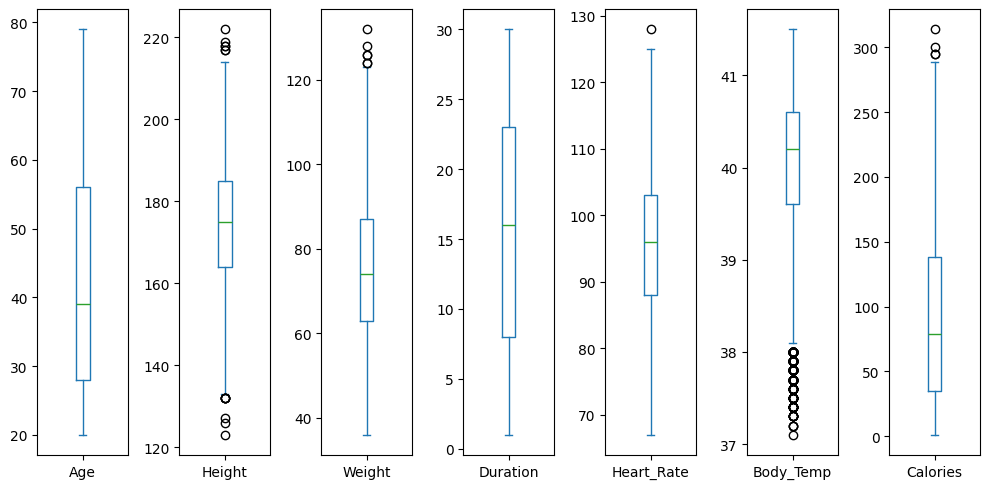

In [9]:
df.plot.box(subplots=True, figsize=(10,5))
plt.tight_layout()

In [10]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

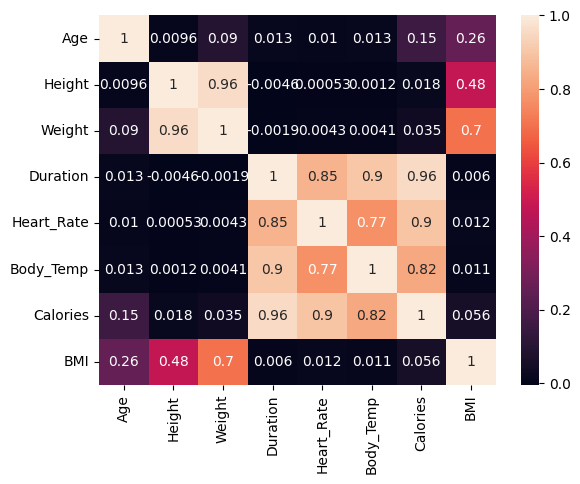

In [13]:
sns.heatmap(df[df.select_dtypes(np.number).columns].corr(), annot=True)

- Exercise duration is the most significant factor in calorie burn.
- Heart rate and body temperature are good indicators of workout intensity.
- Age, height, and weight have minimal impact on calorie burn in this dataset.

In [12]:
df['BMI'] = df['Weight']/((df['Height']/100)**2)